# Battery Discharge

Mathematical models, and in particular ordinary differential equations (ODEs), play a key role in enabling the dynamic representation of the state of charge (SOC) of a battery over time. These tools provide a theoretical basis for predicting the behaviour of batteries under different operating and charging scenarios.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [3]:
# Physical parameters
E0 = 7.4                # Initial voltage (V)
r = 10.05               # Internal resistance (Ohm)
T = 293.15              # Temperature (K)
R = 8.314               # Gas constant (J/mol-K)
F = 96485               # Faraday's constant (C/mol)
z = 1                   # Number of electrons (e.g. lithium)
Ke = (R * T) / (z * F)  # Thermal-electrochemical constant

In [4]:
# Discharge parameters
N = 4.8                  # Rated capacity (Ah)
lambda_ = 7 * 0.02       # Discharge current (A)
t_max = N / lambda_      # Theoretical maximum time
t = np.linspace(0, t_max * 0.95, 1000)

In [5]:
# 1. Classic Nernst model
u_t_classic = N - lambda_ * t
u_t_line = np.clip(u_t_classic / N, 1e-10, None)
E_t_classic = E0 - lambda_ * r + Ke * np.log(u_t_line)

In [6]:
# 2. KiBaM model
c = 0.7  # Fraction of available load
k = 0.1  # Transfer rate

In [7]:
def KiBaM(t, y, lambda_, c, k):
    u, v = y
    du_dt = -lambda_ + k * (v / (1 - c) - u / c)
    dv_dt = -k * (v / (1 - c) - u / c)
    return [du_dt, dv_dt]

y0 = [N * c, N * (1 - c)]

sol = solve_ivp(KiBaM, [0, t_max], y0, args=(lambda_, c, k), t_eval=t, method='LSODA')
u_t_KiBaM = np.clip(sol.y[0], 1e-10, None) 
u_t_KiBaM_line = u_t_KiBaM / N
E_t_KiBaM = E0 - lambda_ * r + Ke * np.log(u_t_KiBaM_line)

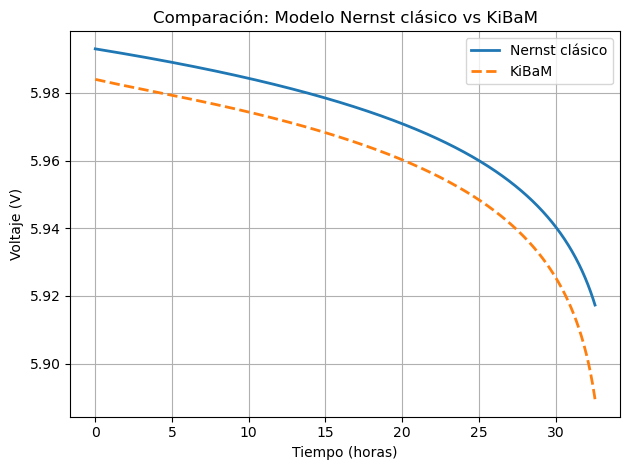

In [14]:
# 3. Comparative graphs
plt.figure()
plt.plot(t, E_t_classic, label="Nernst clásico", linewidth=2)
plt.plot(sol.t, E_t_KiBaM, label="KiBaM", linestyle="--", linewidth=2)
plt.xlabel("Tiempo (horas)")
plt.ylabel("Voltaje (V)")
plt.title("Comparación: Modelo Nernst clásico vs KiBaM")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### References

- Kaj, I., & Konané, V. (2016). *Modeling battery cells under discharge using kinetic and stochastic battery models*. Applied Mathematical Modelling, 40(7901–7915).
